# STUDENT PERFORMANCE ANALYSIS


## From this dataset, we will analyse the influence of parents background,test preparation,etc. on the performance of the student

In [314]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [315]:
# Loading the Dataset

df = pd.read_csv('StudentsPerformance.csv')

In [316]:
# Checking the first five rows of the dataset

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [317]:
# Checking the number of rows and columns in the dataset

df.shape

(1000, 8)

In [318]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [319]:
# Checking the datatypes 

df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### We find that gender,race, parental level of education, lunch,test-preparation course are the categorical Variables

In [320]:
df.iloc[0,:]

gender                                    female
race/ethnicity                           group B
parental level of education    bachelor's degree
lunch                                   standard
test preparation course                     none
math score                                    72
reading score                                 72
writing score                                 74
Name: 0, dtype: object

In [321]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

#### There are more number of males than females in the dataset

In [322]:
df.groupby('gender')['math score'].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [323]:
df.groupby('gender')['reading score'].mean()

gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64

In [324]:
df.groupby('gender')['writing score'].mean()

gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64

### On an average,we find that males score more in maths than females. 
### Females score more in both reading and writing than males


In [325]:
# Checking the stats of numerical columns

num_cols = ['math score','reading score', 'writing score']
df[num_cols].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [326]:
# Checking for the number of null values
pd.isnull(df).sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### There are no null values in the data

In [327]:
#Checking the different categories in each categorical variable of the dataframe
df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [328]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


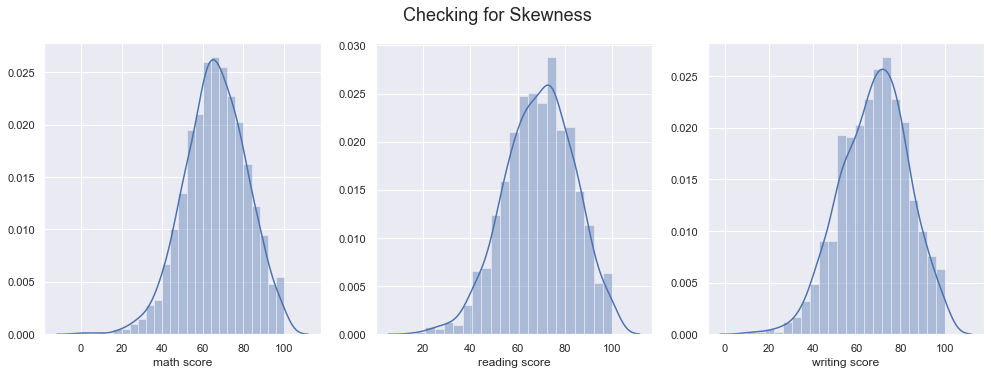

In [329]:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.distplot(df['math score'])

plt.subplot(1, 3, 2)
sns.distplot(df['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(df['writing score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

### No Such Skewness is there

In [330]:
total_students = df.shape[0]
students_score_more_than_50 = df[df['math score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Maths :", probability_of_students_scoring_more_than_50_in_maths)

Probability of Students Scoring more than 50 marks in Maths : 85.0


In [331]:
total_students = df.shape[0]
students_score_more_than_50 = df[df['reading score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_reading = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Reading :", probability_of_students_scoring_more_than_50_in_reading)

Probability of Students Scoring more than 50 marks in Reading : 90.3


In [332]:
total_students = df.shape[0]
students_score_more_than_50 = df[df['writing score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_writing = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Writing :", probability_of_students_scoring_more_than_50_in_writing)

Probability of Students Scoring more than 50 marks in Writing : 87.6


In [333]:
total_students = df.shape[0]
number_of_students_passing_in_all_subjects = df[(df['math score'] > 40) &
                                                  (df['writing score'] > 40) & 
                                                  (df['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %


In [334]:
df.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

In [335]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


### Reading and Writing Score have very high positive correlation. That is, if a student scores high in reading, then he/she has a higher probability of scoring more in writing too.

In [336]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [337]:
df.rename(columns = {'math score':'math_score','reading score':'reading_score','writing score':'writing_score'}, inplace = True) 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [338]:
df_gender = pd.get_dummies(df['gender'])

In [339]:
df_new = pd.concat([df, df_gender], axis=1)

In [340]:
df_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,female,male
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0
1,female,group C,some college,standard,completed,69,90,88,1,0
2,female,group B,master's degree,standard,none,90,95,93,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1
4,male,group C,some college,standard,none,76,78,75,0,1


In [345]:
df_new.drop(['gender'],axis=1,inplace=True)

In [346]:
df_new.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,female,male
0,group B,bachelor's degree,standard,none,72,72,74,1,0
1,group C,some college,standard,completed,69,90,88,1,0
2,group B,master's degree,standard,none,90,95,93,1,0
3,group A,associate's degree,free/reduced,none,47,57,44,0,1
4,group C,some college,standard,none,76,78,75,0,1
